#Thuật toán AdaBoost - Bùi Trần Gia Bảo - 60TH2


In [4]:
#import thu vien
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn import tree

In [ ]:
#import file
letters = pd.read_csv("./letters_CG.csv") 
#hiển thị 10 dòng dữ liệu đầu tiên
letters.head(10) 

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,C,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,C,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,G,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,C,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,G,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9
5,G,2,1,2,2,1,7,7,6,5,6,6,10,2,9,4,9
6,G,3,7,4,5,3,6,5,5,6,6,6,9,2,9,3,7
7,C,3,6,5,4,1,6,8,6,10,7,7,12,1,7,4,9
8,G,5,7,6,5,3,6,7,6,6,10,8,8,2,9,5,9
9,C,5,8,6,6,2,6,7,7,10,6,6,15,1,8,4,9


In [ ]:
#Hiển thị 1509 dòng dữ liệu và 17 thuộc tính
print("Dữ liệu gốc và thuộc tính:", letters.shape)

Dữ liệu gốc và thuộc tính: (1509, 17)


In [ ]:
#Xem classification
letters['Class'].value_counts()

G    773
C    736
Name: Class, dtype: int64

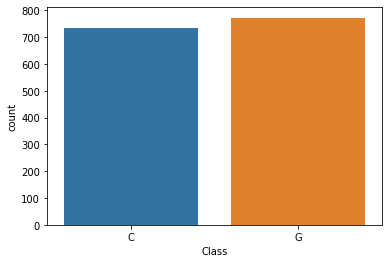

In [ ]:
#đếm số lượng C và G
#Ta thấy số lượng có sự cân bằng
sns.countplot( x = letters['Class'])

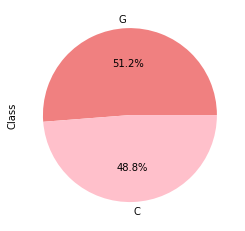

In [ ]:
#Biểu đồ tròn thể hiện phần trăm 
round(letters['Class'].value_counts()/letters.shape[0]*100,2).plot.pie(autopct = '%1.1f%%', colors = ['lightcoral', 'pink'])

In [ ]:
#Đổi thuộc tính Class chữ thành số 'C' thành 1 'G' thành -1
letters['Class'] = letters['Class'].map({'C':1,'G':-1})

In [ ]:
#sau khi chuyển chữ thành số nó sẽ ra thuộc tính như sau
#hiển thị 5 d0ng du lieu
letters.head(5)

,Class,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,1,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9
1,1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7
2,-1,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10
3,1,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7
4,-1,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9


In [ ]:
#Thông tin chứa số cột, nhãn cột, kiểu dữ liệu cột, mức sử dụng bộ nhớ, chỉ số phạm vi và số ô trong mỗi cột (giá trị không rỗng)
letters.info

<bound method DataFrame.info of       Class  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  \
0         1      4     10      5     8      2      5      7      7     10   
1         1      3      5      4     4      2      4      8      5      7   
2        -1      5     10      6     7      3      8      7      8      8   
3         1      5      9      6     7      4      3      8      6      7   
4        -1      4      8      5     6      3      6      6      7      6   
...     ...    ...    ...    ...   ...    ...    ...    ...    ...    ...   
1504      1      5     10      6     8      4      5      8      9      9   
1505      1      6     11      7     8      4      6      7     10      9   
1506     -1      5      9      6     7      4      6      7      6      6   
1507      1      6     11      7     8      5      5      8      7      6   
1508      1      5     10      5     8      3      6      8      7      7   

      xybar  x2ybr  xy2br  x-ege  xegvy  y-

In [ ]:
#import các thư viện còn thiếu
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from math import log,exp

In [ ]:
#remove cái thuộc tính caterogy để tiến hành train và test
X = letters.drop('Class', axis = 1)
y = letters['Class']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=0)
model = adb.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([ 1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,
        1,  1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1, -1, -1, -1,
        1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,
       -1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,
        1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
        1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
        1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        1, -1, -1,  1, -1

#Xây dựng chương trình AdaBoost chưa qua Decesion Stump

In [ ]:
print('TEST RESULT:\n ')
# REPORT
print('Decision tree Classifier Report:\n\n{} \n' .format(classification_report(y_test, y_pred)))

res = cross_val_score(model, X_test, y_test, cv=10, n_jobs=1, scoring = 'accuracy')

#Độ chính xác trung bình
print('Average Accucy: \t{0:.4f}\n'.format((res.mean())))

print('Standard Deviation: \t{0:.4f}\n'.format((res.std())))

print('Confusion Matrix :\n{}\n'.format(confusion_matrix(y_test, model.predict(X_test))))

print('Accuracy Score :\t\t{}%'.format(round(model.score( X_test, y_test)*100,2)))

TEST RESULT:
 
Decision tree Classifier Report:

              precision    recall  f1-score   support

          -1       0.94      0.95      0.95       229
           1       0.95      0.94      0.95       224

    accuracy                           0.95       453
   macro avg       0.95      0.95      0.95       453
weighted avg       0.95      0.95      0.95       453
 

Average Accucy: 	0.9358

Standard Deviation: 	0.0290

Confusion Matrix :
[[218  11]
 [ 13 211]]

Accuracy Score :		94.7%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


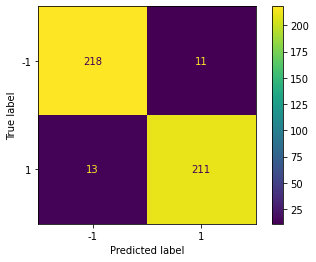

In [ ]:
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
print ('Train Accuracy - : {}%'.format(round(model.score( X_train, y_train)*100,2)))
print ('Test Accuracy - : {}%'.format(round(model.score( X_test, y_test)*100,2)))

Train Accuracy - : 100.0%
Test Accuracy - : 94.7%


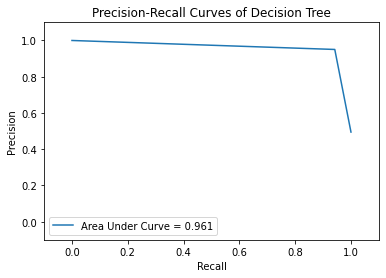

In [ ]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("dtpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

#Sử dụng Decision Stumps để thiết kế chương trình AdaBoost

In [ ]:
#thêm cột label tựa như Class để tiến hành phân loại bằng Decision Stump
letters['Label'] = letters['Class'].replace(to_replace = ['C','G'], value=[1,-1])

In [ ]:
letters["pro"] = 1 / (letters.shape[0])
letters = letters.drop('Class', axis = 1)
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Label,pro
0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,1,0.000663
1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,1,0.000663
2,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,-1,0.000663
3,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,1,0.000663
4,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,-1,0.000663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4,9,1,0.000663
1505,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9,1,0.000663
1506,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9,-1,0.000663
1507,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6,1,0.000663


```
# Round thứ 1
```

[Text(0.5, 0.75, 'X[11] <= 11.5\ngini = 0.498\nsamples = 1509\nvalue = [805, 704]'),
 Text(0.25, 0.25, 'gini = 0.38\nsamples = 983\nvalue = [732, 251]'),
 Text(0.75, 0.25, 'gini = 0.239\nsamples = 526\nvalue = [73, 453]')]

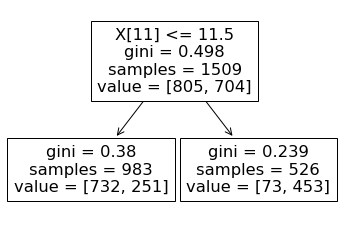

In [ ]:
random.seed(10)
letters1 = letters.sample(len(letters), replace = True, weights = letters['pro'])
X_train = letters1.drop('Label', axis = 1)
y_train = letters1.Label
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 1)
clf = clf_gini.fit(X_train, y_train)

tree.plot_tree(clf)

[Text(0.5, 0.75, 'X[11] <= 11.5\ngini = 0.498\nsamples = 1509\nvalue = [805, 704]'),
 Text(0.25, 0.25, 'gini = 0.38\nsamples = 983\nvalue = [732, 251]'),
 Text(0.75, 0.25, 'gini = 0.239\nsamples = 526\nvalue = [73, 453]')]

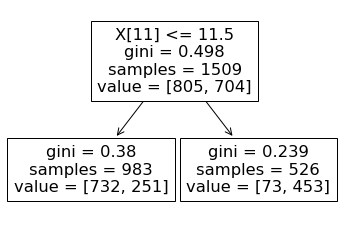

In [ ]:
X_train = letters1.drop('Label', axis = 1)
y_train = letters1.Label
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100, max_depth = 1)
clf = clf_gini.fit(X_train, y_train)

tree.plot_tree(clf)

In [ ]:
#dự đoán
y_pred = clf_gini.predict(X_train) 
y_pred

array([ 1, -1, -1, ...,  1, -1,  1])

In [ ]:
#thêm cột pred sau vòng tăng cường đầu tiên
letters['pred'] = y_pred

In [ ]:
#hiển thị cột pred vừa thêm
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,Label,pro,pred
0,4,10,5,8,2,5,7,7,10,7,6,13,1,8,4,9,1,0.000663,1
1,3,5,4,4,2,4,8,5,7,12,9,11,1,10,2,7,1,0.000663,-1
2,5,10,6,7,3,8,7,8,8,6,7,9,2,7,5,10,-1,0.000663,-1
3,5,9,6,7,4,3,8,6,7,12,10,13,1,9,3,7,1,0.000663,-1
4,4,8,5,6,3,6,6,7,6,10,7,12,2,9,4,9,-1,0.000663,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,9,12,2,10,4,9,1,0.000663,-1
1505,6,11,7,8,4,6,7,10,9,10,7,11,2,12,4,9,1,0.000663,1
1506,5,9,6,7,4,6,7,6,6,10,7,10,2,9,5,9,-1,0.000663,1
1507,6,11,7,8,5,5,8,7,6,8,8,15,4,9,6,6,1,0.000663,-1


In [ ]:
#phân loại = 0 nếu nhãn và dự đoán giống nhau
letters.loc[letters.Label != letters.pred, 'misclassified'] = 1
letters.loc[letters.Label == letters.pred, 'misclassified'] = 0

In [ ]:
#tính toán lỗi
err_1 = sum(letters['misclassified'] * letters['pro'])
err_1

0.5009940357852927

In [ ]:
#tính toán alpha (hiệu suất)
alp_1 = 0.5 * log((1-err_1) / err_1)
alp_1

-0.001988074189828509

In [ ]:
#update pro
new_pro = letters['pro']*np.exp(-1*alp_1*letters['Label']*letters['pred'])

In [ ]:
#trọng lượng pro
z = sum(new_pro)
normalized_pro = new_pro / sum(new_pro)

In [ ]:
letters['pro_1'] = round(normalized_pro, 4)
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,xy2br,x-ege,xegvy,y-ege,yegvx,Label,pro,pred,misclassified,pro_1
0,4,10,5,8,2,5,7,7,10,7,...,13,1,8,4,9,1,0.000663,1,0.0,0.0007
1,3,5,4,4,2,4,8,5,7,12,...,11,1,10,2,7,1,0.000663,-1,1.0,0.0007
2,5,10,6,7,3,8,7,8,8,6,...,9,2,7,5,10,-1,0.000663,-1,0.0,0.0007
3,5,9,6,7,4,3,8,6,7,12,...,13,1,9,3,7,1,0.000663,-1,1.0,0.0007
4,4,8,5,6,3,6,6,7,6,10,...,12,2,9,4,9,-1,0.000663,1,1.0,0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,12,2,10,4,9,1,0.000663,-1,1.0,0.0007
1505,6,11,7,8,4,6,7,10,9,10,...,11,2,12,4,9,1,0.000663,1,0.0,0.0007
1506,5,9,6,7,4,6,7,6,6,10,...,10,2,9,5,9,-1,0.000663,1,1.0,0.0007
1507,6,11,7,8,5,5,8,7,6,8,...,15,4,9,6,6,1,0.000663,-1,1.0,0.0007


```
# Round thứ 2
```

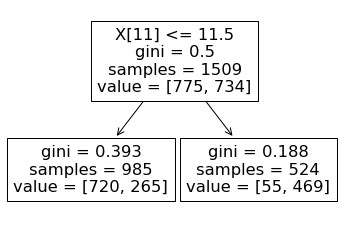

In [ ]:
#tiếp tục với round thứ 2, em gộp chung các err và alpha lại với nhau
random.seed(20)
letters_2 = letters.sample(len(letters), replace = True, weights = letters['pro_1'])
letters_2 = letters_2.iloc[:,0:17]
X_train = letters_2.iloc[0:len(letters),0:16]
y_train = letters_2.Label

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(letters.iloc[0:len(letters),0:16])
#adding a column pred2 after the second round of boosting
letters['pred_1'] = y_pred
tree.plot_tree(clf)

letters.loc[letters.Label != letters.pred_1, 'misclassified1'] = 1
letters.loc[letters.Label == letters.pred_1, 'misclassified1'] = 0
#tính toán lỗi
err_2 = sum(letters['misclassified1'] * letters['pro_1'])
#tính toán alpha (hiệu suất)
alp_2 = 0.5 * log((1 - err_2) / err_2)
#update pro
new_pro = letters['pro_1']*np.exp(-1*alp_2*letters['Label']*letters['pred_1'])
#trọng lượng pro
z = sum(new_pro)
normalized_pro = new_pro / sum(new_pro)


In [ ]:
letters['pro_2'] = round(normalized_pro, 4)
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,y-ege,yegvx,Label,pro,pred,misclassified,pro_1,pred_1,misclassified1,pro_2
0,4,10,5,8,2,5,7,7,10,7,...,4,9,1,0.000663,1,0.0,0.0007,1,0.0,0.0004
1,3,5,4,4,2,4,8,5,7,12,...,2,7,1,0.000663,-1,1.0,0.0007,-1,1.0,0.0014
2,5,10,6,7,3,8,7,8,8,6,...,5,10,-1,0.000663,-1,0.0,0.0007,-1,0.0,0.0004
3,5,9,6,7,4,3,8,6,7,12,...,3,7,1,0.000663,-1,1.0,0.0007,1,0.0,0.0004
4,4,8,5,6,3,6,6,7,6,10,...,4,9,-1,0.000663,1,1.0,0.0007,1,1.0,0.0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,4,9,1,0.000663,-1,1.0,0.0007,1,0.0,0.0004
1505,6,11,7,8,4,6,7,10,9,10,...,4,9,1,0.000663,1,0.0,0.0007,-1,1.0,0.0014
1506,5,9,6,7,4,6,7,6,6,10,...,5,9,-1,0.000663,1,1.0,0.0007,-1,0.0,0.0004
1507,6,11,7,8,5,5,8,7,6,8,...,6,6,1,0.000663,-1,1.0,0.0007,1,0.0,0.0004




```
# Round thứ 3
```



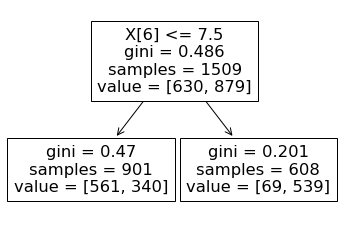

In [ ]:
random.seed(30)
letters_3 = letters.sample(len(letters), replace = True, weights = letters['pro_2'])
letters_3 = letters_3.iloc[:,0:17]
X_train = letters_3.iloc[0:len(letters),0:16]
y_train = letters_3.Label

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(letters.iloc[0:len(letters),0:16])

#adding a column pred2 after the second round of boosting
letters['pred_2'] = y_pred

#plotting tree for round 3 boosting
tree.plot_tree(clf)

#misclassified = 0 if the label and prediction are same
letters.loc[letters.Label != letters.pred_2, 'misclassified2'] = 1
letters.loc[letters.Label == letters.pred_2, 'misclassified2'] = 0

#tính toán lỗi
err_3 = sum(letters['misclassified2'] * letters['pro_2'])

#tính toán alpha (hiệu suất)
alp_3 = 0.5 * log((1 - err_3) / err_3)

#update pro
new_weight = letters['pro_2'] * np.exp(-1 * alp_3 * letters['Label'] * letters['pred_2'])

#trọng lượng pro
z = sum(new_weight)
normalized_weight = new_weight / sum(new_weight)


In [ ]:
letters['pro_3'] = round(normalized_weight, 4)
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,pro,pred,misclassified,pro_1,pred_1,misclassified1,pro_2,pred_2,misclassified2,pro_3
0,4,10,5,8,2,5,7,7,10,7,...,0.000663,1,0.0,0.0007,1,0.0,0.0004,-1,1.0,0.0007
1,3,5,4,4,2,4,8,5,7,12,...,0.000663,-1,1.0,0.0007,-1,1.0,0.0014,1,0.0,0.0010
2,5,10,6,7,3,8,7,8,8,6,...,0.000663,-1,0.0,0.0007,-1,0.0,0.0004,-1,0.0,0.0003
3,5,9,6,7,4,3,8,6,7,12,...,0.000663,-1,1.0,0.0007,1,0.0,0.0004,1,0.0,0.0003
4,4,8,5,6,3,6,6,7,6,10,...,0.000663,1,1.0,0.0007,1,1.0,0.0014,-1,0.0,0.0010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,0.000663,-1,1.0,0.0007,1,0.0,0.0004,1,0.0,0.0003
1505,6,11,7,8,4,6,7,10,9,10,...,0.000663,1,0.0,0.0007,-1,1.0,0.0014,-1,1.0,0.0025
1506,5,9,6,7,4,6,7,6,6,10,...,0.000663,1,1.0,0.0007,-1,0.0,0.0004,-1,0.0,0.0003
1507,6,11,7,8,5,5,8,7,6,8,...,0.000663,-1,1.0,0.0007,1,0.0,0.0004,1,0.0,0.0003




```
# Round thứ 4
```



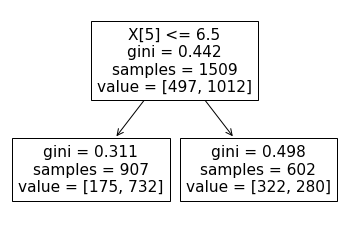

In [ ]:
random.seed(40)
letters_4 = letters.sample(len(letters), replace = True, weights = letters['pro_3'])
letters_4 = letters_4.iloc[:,0:17]
X_train = letters_4.iloc[0:len(letters),0:16]
y_train = letters_4.Label

clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=1)
clf = clf_gini.fit(X_train, y_train)

y_pred = clf_gini.predict(letters.iloc[0:len(letters),0:16])

#adding a column pred2 after the second round of boosting
letters['pred_3'] = y_pred

#plotting tree for round 3 boosting
tree.plot_tree(clf)

#misclassified = 0 if the label and prediction are same
letters.loc[letters.Label != letters.pred_3, 'misclassified3'] = 1
letters.loc[letters.Label == letters.pred_3, 'misclassified3'] = 0

#error calculation
err_4 = sum(letters['misclassified3'] * letters['pro_3'])

#calculation of alpha (performance)
alp_4 = 0.5 * log((1 - err_4) / err_4)

In [ ]:
print(alp_1)
print(alp_2)
print(alp_3)
print(alp_4)

-0.001988074189828509
0.5837698028642334
0.45646657308964855
0.41818465457988824


In [ ]:
#final prediction
t = alp_1 * letters['pred'] + alp_2 * letters['pred_1'] + alp_3 * letters['pred_2'] + alp_4 * letters['pred_3']

In [ ]:
#sign of the final prediction
np.sign(list(t))

array([ 1.,  1., -1., ..., -1.,  1.,  1.])

In [ ]:
letters['final_pred'] = np.sign(list(t))
letters

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,...,pro_1,pred_1,misclassified1,pro_2,pred_2,misclassified2,pro_3,pred_3,misclassified3,final_pred
0,4,10,5,8,2,5,7,7,10,7,...,0.0007,1,0.0,0.0004,-1,1.0,0.0007,1,0.0,1.0
1,3,5,4,4,2,4,8,5,7,12,...,0.0007,-1,1.0,0.0014,1,0.0,0.0010,1,0.0,1.0
2,5,10,6,7,3,8,7,8,8,6,...,0.0007,-1,0.0,0.0004,-1,0.0,0.0003,-1,0.0,-1.0
3,5,9,6,7,4,3,8,6,7,12,...,0.0007,1,0.0,0.0004,1,0.0,0.0003,1,0.0,1.0
4,4,8,5,6,3,6,6,7,6,10,...,0.0007,1,1.0,0.0014,-1,0.0,0.0010,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,5,10,6,8,4,5,8,9,9,9,...,0.0007,1,0.0,0.0004,1,0.0,0.0003,1,0.0,1.0
1505,6,11,7,8,4,6,7,10,9,10,...,0.0007,-1,1.0,0.0014,-1,1.0,0.0025,1,0.0,-1.0
1506,5,9,6,7,4,6,7,6,6,10,...,0.0007,-1,0.0,0.0004,-1,0.0,0.0003,1,1.0,-1.0
1507,6,11,7,8,5,5,8,7,6,8,...,0.0007,1,0.0,0.0004,1,0.0,0.0003,1,0.0,1.0


In [ ]:
#Confusion matrix
cm = confusion_matrix(letters['Label'], letters['final_pred'])
cm

array([[725,  48],
       [173, 563]])

In [ ]:
(cm[0,0] + cm[1,1]) / np.sum(cm) * 100

85.35453943008615

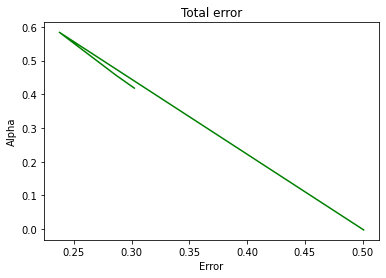

In [ ]:
plt.plot([err_1, err_2, err_3, err_4], [alp_1, alp_2, alp_3, alp_4], 'g-')
plt.title('Total error')
plt.xlabel('Error')
plt.ylabel('Alpha')
plt.show()